In [1]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

## Part 1

In [2]:
def draw_histogram(image):
  
  plt.hist(image.flatten(),256,[0,256], color = 'r')
  plt.show()

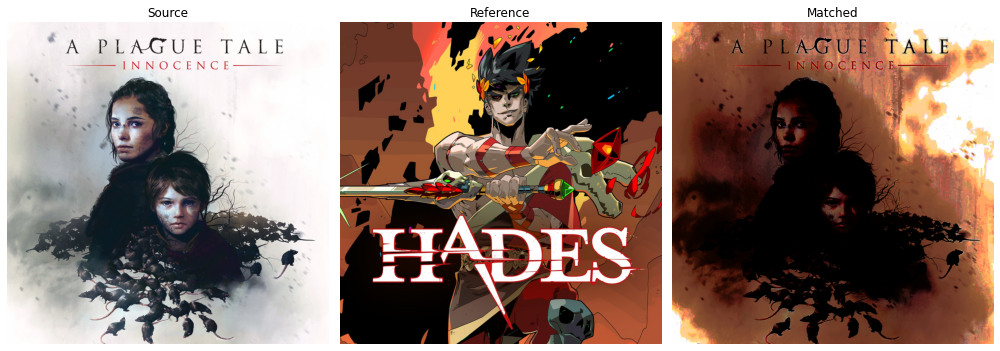

In [6]:
source = plt.imread('/content/A Plague Tale.jpg')
reference = plt.imread('/content/Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference , multichannel=True)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 2

In [10]:
BRIGHTNESS_LAYERS = 256
def compute_cdf (image):
  pdf = np.zeros(BRIGHTNESS_LAYERS)

  for pixel in np.nditer(image) :
    pdf[np.round_(pixel)] += 1

  cdf = np.cumsum(pdf)

  return cdf

In [11]:
def extract_channels(img):
  
  channels_count = img.shape[2]
  channels = [img[:,:,i] for i in range(channels_count)]

  return channels_count,channels

In [12]:
def match_histogram_channels(src , ref):
  
  transition= np.zeros((BRIGHTNESS_LAYERS))
  for j in range(1,BRIGHTNESS_LAYERS):
    for i in range(1,BRIGHTNESS_LAYERS):
      if src[j] <= ref[i] :
        transition[j] = i
        break

  transition[BRIGHTNESS_LAYERS-1] = BRIGHTNESS_LAYERS-1
  return transition

In [8]:
def hist_matching(src_image, ref_image):
  '''
  inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output:
    output_image (ndarray): transformed image 
  '''

  channels_count , src_channels = extract_channels(src_image)
  channels_count , ref_channels = extract_channels(ref_image)
  
  output_image_channels = []
  for i in range(channels_count):
    src_channel = src_channels[i]
    src_cdf = compute_cdf(src_channel)

    ref_channel = ref_channels[i]
    ref_cdf = compute_cdf(ref_channel)

    transition = match_histogram_channels(src_cdf,ref_cdf)
    output_image_channels.append(transition[src_channel])

  output_image = np.dstack((output_image_channels[0],output_image_channels[1],output_image_channels[2])).astype(int)
  
  assert output_image.shape == (1024,1024,3)
  
  ### YOUR CODE ###
  # START
  # matched = 
  # END

  return output_image

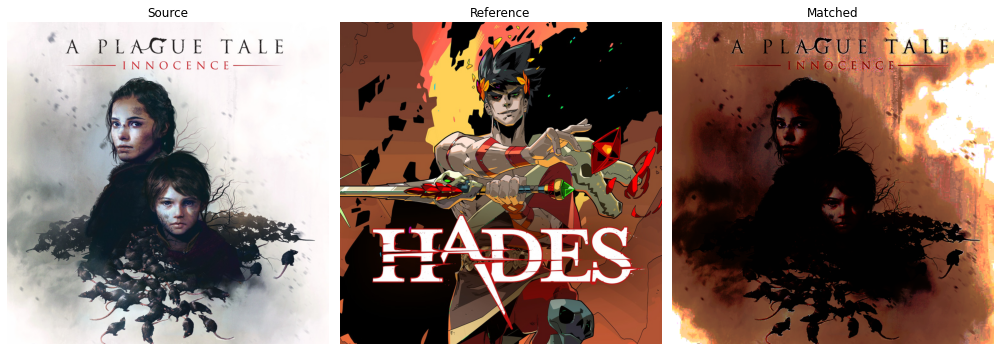

In [13]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = hist_matching(source , reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 3

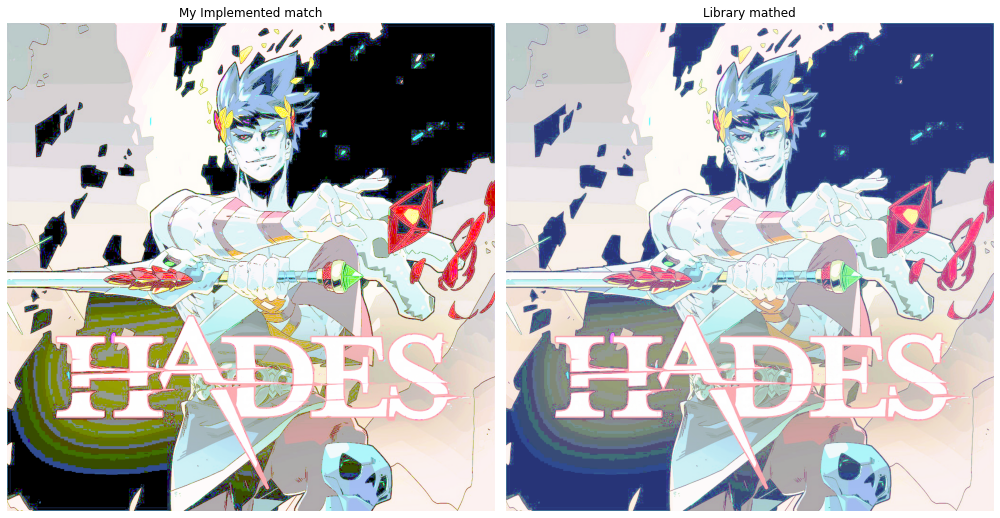

In [15]:
reference = plt.imread('A Plague Tale.jpg')
source = plt.imread('Hades.jpg')

my_matched = hist_matching(source , reference)
library_matched = match_histograms(source, reference , multichannel=True)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(my_matched)
ax1.set_title('My Implemented match')
ax2.imshow(library_matched)
ax2.set_title('Library mathed')

plt.tight_layout()
plt.show()

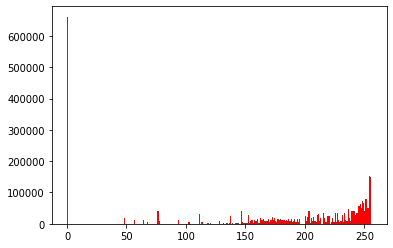

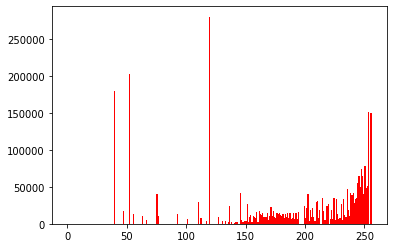

In [16]:
draw_histogram(my_matched)
draw_histogram(library_matched)